# **Mini Projects (Python): Unraveling Crime Patterns in Los Angeles Through Data Analysis**

## **Executive Summary**

This analysis of crime data reveals key patterns: Noon is the peak hour for crimes, and the Central area sees the most night-time crimes. The age distribution shows crime prevalence across all age groups, offering crucial insights for targeted interventions and resource allocation.

## **Business Question and Objectives**

1. Which hour has the highest frequency of crimes?
2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
3. Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)

### **Technique Used**

- Data Extraction and Transformation: String manipulation and type conversion.
- Data Filtering: Subsetting the DataFrame based on specific conditions.
- Grouping and Aggregation: Grouping data and counting occurrences.
- Data Visualization: Using plots to visually represent data distributions.
- Binning: Categorizing continuous data into discrete intervals.

### **Key Findings**

1. **Peak Crime Hour:**
The analysis identified that the hour with the highest frequency of crimes is 12 PM (midday), with over 12,000 reported incidents during this hour. This suggests that crime rates may peak during the day, possibly due to increased activity in public spaces.

2. **Area with the Largest Volume of Night Crimes:**
The area with the highest frequency of night crimes (crimes committed between 10 PM and 3:59 AM) is identified as Central. This indicates that certain areas may be more prone to criminal activity during nighttime hours, which could be influenced by factors such as nightlife, population density, or lack of surveillance.

3. **Victim Age Groups:**
The analysis categorized crimes based on the age of victims into several brackets. The findings show that the age group 26-34 has the highest number of reported crimes (47,470 incidents), followed closely by 35-44 and 45-54 age groups. This suggests that younger adults may be more frequently targeted or involved in criminal incidents.


#### **Import and Read Data**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in and preview the dataset
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,index,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


### **To determine the hour with the highest frequency of crimes**

In [2]:
# Extract the first two digits from "TIME OCC", representing the hour, and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

In [3]:
# Preview the DataFrame to confirm the new column is correct
crimes.head()

,index,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,63
4,4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,90


C:\Users\Muhammad Dandi\AppData\Local\Temp\ipykernel_8872\2682788834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crimes, x="HOUR OCC", palette="viridis")


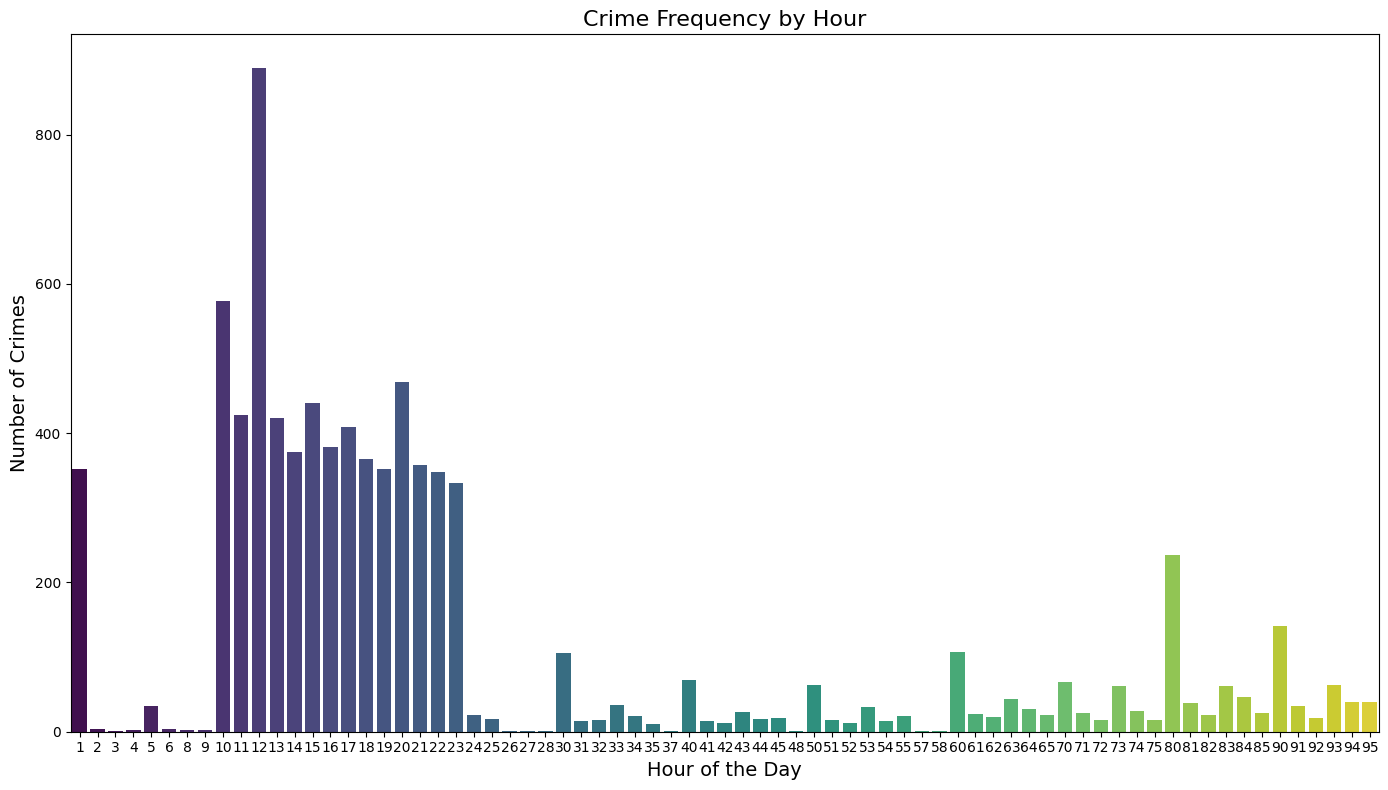

In [9]:
# Set the figure size to make the plot larger
plt.figure(figsize=(14, 8))

# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC", palette="viridis")

# Add titles and labels for clarity
plt.title("Crime Frequency by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
# Midday has the largest volume of crime
peak_crime_hour = 12

### **To identify the area with the highest occurrence of night crimes (between 10 PM and 3:59 AM)**

In [6]:
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., not including 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is 77th Street


### **To identify the number of crimes committed against victims categorized by age group**
Within the ranges of 0-17, 18-25, 26-34, 35-44, 45-54, 55-64, and 65 and older.

In [7]:
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

In [8]:
# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    1996
35-44    1810
45-54    1292
18-25    1272
55-64     998
65+       688
0-17      277
Name: count, dtype: int64
